In [216]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms


In [217]:
import warnings
warnings.filterwarnings("ignore")

In [218]:
# Подключаем графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
sns.set_theme('notebook')
sns.set_palette('Set2')

In [220]:
alpha=0.05
print(f'Уровень значимости alpha={alpha}')

Уровень значимости alpha=0.05


In [221]:
salaries=pd.read_csv('ds_salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


1. Датасет содержит 607 записей без пропущенных значений.
2. Числовые значения имеют корректный целый тип.
3. Признаки salary и salary_currency  можно исключить из исследования, так как размер зарплаты переведенной по курсу в доллар (salary_in_usd) более информативен.
4. К числовым признакам относятся признаки: salary, salary_in_usd.
5. Остальные признаки являются категориальными. 
6. Из категориальных признаков порядковыми являются: work_year, experience_level, remote_ratio, company_size.
7. Остальные признаки являются номинальными: employment_type, job_title, company_location, salary_currency.

In [222]:
# Переводим год в дату
salaries['work_year']=pd.to_datetime(salaries['work_year'], format='%Y')

In [223]:
# Удалим признаки salary и salary_currency
salaries.drop(columns=['salary', 'salary_currency'], axis=1,inplace= True)
salaries

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020-01-01,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020-01-01,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020-01-01,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020-01-01,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020-01-01,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,602,2022-01-01,SE,FT,Data Engineer,154000,US,100,US,M
603,603,2022-01-01,SE,FT,Data Engineer,126000,US,100,US,M
604,604,2022-01-01,SE,FT,Data Analyst,129000,US,0,US,M
605,605,2022-01-01,SE,FT,Data Analyst,150000,US,100,US,M


Проверка на наличие дубликатов

In [224]:
print(f'Количество дубликатов {salaries[salaries.duplicated].shape[0]}')

Количество дубликатов 0


In [225]:
salaries['salary_in_usd'].mean()

112297.86985172982

# Базовый анализ всех признаков

Распределение зарплат в $ всем клиентам

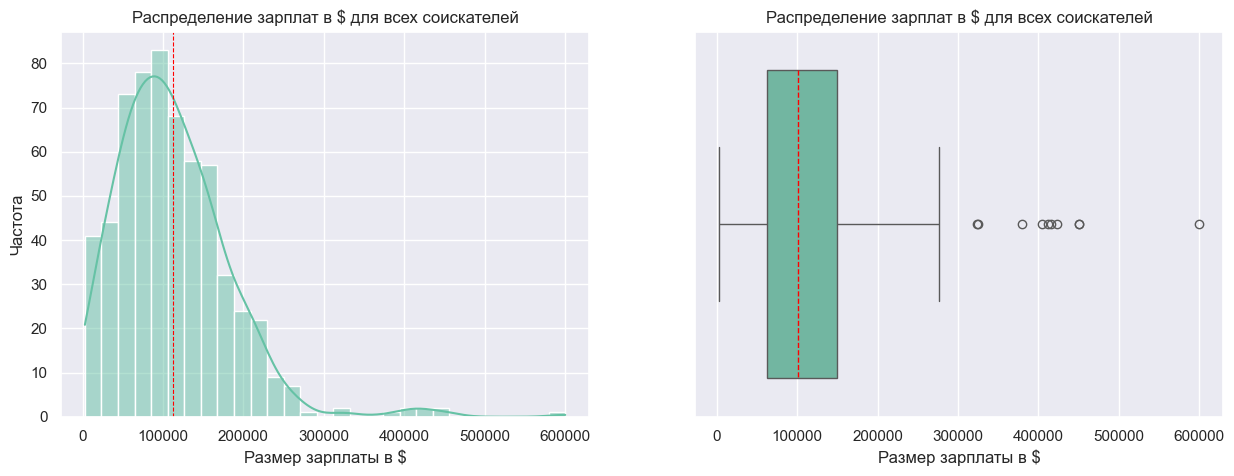

In [226]:
fig, axes=plt.subplots(1,2, figsize=(15,5))

sns.histplot(salaries['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в $', ylabel='Частота')
axes[0].set_title('Распределение зарплат в $ для всех соискателей')
axes[0].axvline(salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(salaries['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(xlabel='Размер зарплаты в $')
axes[1].set_title('Распределение зарплат в $ для всех соискателей')

plt.show()

In [227]:
salaries['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

Выводы: 
1. Распределение не является нормальным.
2. Большая часть наблюдений сосредоточена в диапазоне от 0 до 300000.
3. Мода распределения находится левее среднего значения.
4. Имеется некоторое количество выбросов - зарплаты выше 300000. Они являются причиной отклонения распределения от нормального.
5. Среднее значение немного больше медианного значения заработной платы.

##### Изучение признака work_year

In [228]:
work_year=salaries['work_year'].value_counts()
work_year

work_year
2022-01-01    318
2021-01-01    217
2020-01-01     72
Name: count, dtype: int64

Text(0.5, 1.0, 'Распределение количества соискателей по годам')

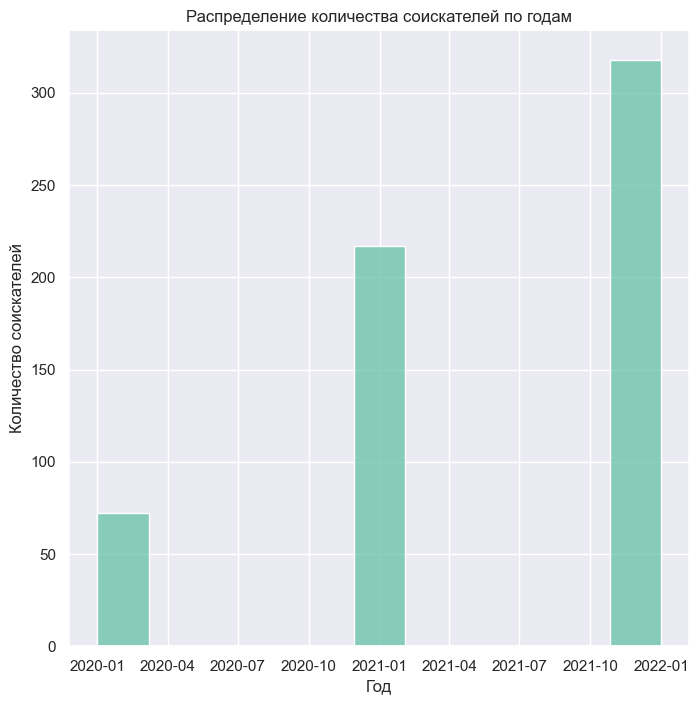

In [229]:
fig, axes=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=salaries['work_year'])
axes.set(xlabel='Год', ylabel='Количество соискателей')
axes.set_title('Распределение количества соискателей по годам')

В датасете приведены данные за три года - 2020, 2021, 2022. Основная масса соискателей представлена 2021 и 2022 годами

##### Изучение признака experience_level


In [230]:
# experience_level в процентах
experience_level=salaries['experience_level'].value_counts(normalize=True)*100
experience_level

experience_level
SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Распределение количества соискателей по уровню')

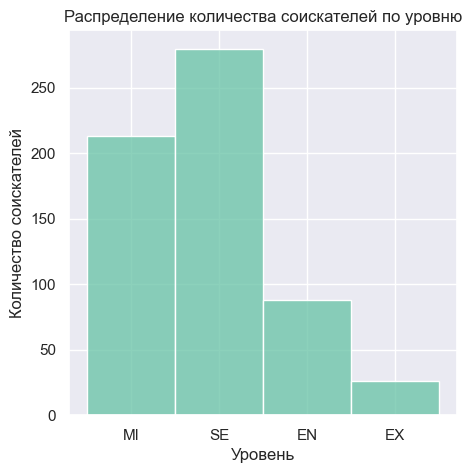

In [231]:
fig, axes=plt.subplots(1,1, figsize=(5,5))
sns.histplot(data=salaries['experience_level'])
axes.set(xlabel='Уровень', ylabel='Количество соискателей')
axes.set_title('Распределение количества соискателей по уровню')

Выводы:
Наибольшее количество соискателей имеют опыт работы mid-level (35%) и senior-level (46%).  Лишь около 4% соискателей работали на уровне руководителя проекта.

##### Изучение признака employment_type

In [232]:
# employment_type в процентах
employment_type=salaries['employment_type'].value_counts(normalize=True)*100
employment_type

employment_type
FT    96.869852
PT     1.647446
CT     0.823723
FL     0.658979
Name: proportion, dtype: float64

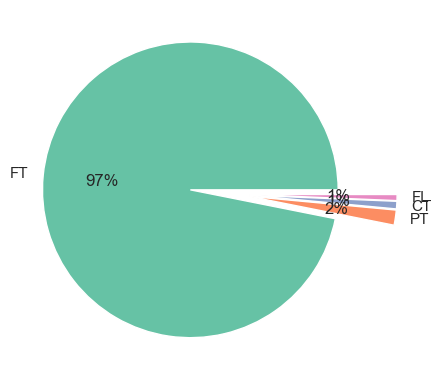

In [233]:
explode = [0.3, 0.1, 0.1, 0.1]
plt.pie(employment_type, labels=employment_type.index, autopct='%.0f%%', explode=explode)
plt.show()

97% соискателей работали на полный рабочий день. Неполный рабочий день, контракт и фриланс составляют соответственно 1.6%, 0.8% и 0.6%

#### Изучение признака employee_residence

In [234]:

employee_residence=salaries['employee_residence'].value_counts()
print(f'Представлены соискатели из {employee_residence.shape[0]} стран')

Представлены соискатели из 57 стран


In [235]:
employee_residence

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

Представлены соискатели из 57 стран. При чем ряд стран представлен менее, чем 10 соискателями. Имеет смысл заменить страну на "Other" для всех, стран, которые представлены числом соискателей менее 10.

In [236]:
# Замена стран, где менее 10 соискателей на "Other"
salaries['employee_residence']=salaries['employee_residence'].apply(lambda x: x if x in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR'] else 'Other')
employee_residence=salaries['employee_residence'].value_counts()

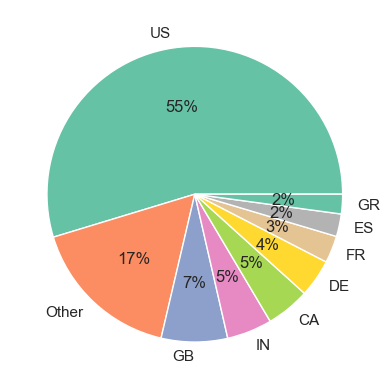

In [237]:
plt.pie(employee_residence, labels=employee_residence.index, autopct='%.0f%%')
plt.show()

Более половины соискателей из США. На втором месте соискатели из Великобритании - 7%. Остальные страны представлены менее, чем 5% соискателей.

#### Изучение признака company_location

In [238]:

company_location=salaries['company_location'].value_counts()
print(f'Представлены компании из {company_location.shape[0]} стран')

Представлены компании из 50 стран


In [239]:
company_location

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

Также имеет смысл сделать замену - везде, где менее 10 соискателей заменим страну комнании на "Other"

In [240]:
# Замена стран, где менее 10 соискателей на "Other"
salaries['company_location']=salaries['company_location'].apply(lambda x: x if x in ['US', 'GB', 'CA', 'DE','IN', 'FR', 'ES', 'GR'] else 'Other')
company_location=salaries['company_location'].value_counts()

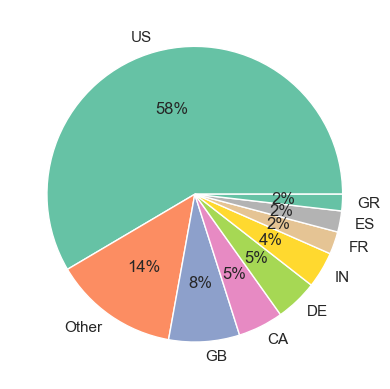

In [241]:
plt.pie(company_location, labels=company_location.index, autopct='%.0f%%')
plt.show()

Выводы: Ситуация аналогичная ситуации со страной проживания сотрудника:
1. Списки стран совпадают.
2. На первом месте с большим отрывом (58%) компании из США.
3. На втором месте - Великобритания (8%). Остальные страны занимают 1-5%.

#### Изучение признака remote_ratio

In [242]:
remote_ratio=salaries['remote_ratio'].value_counts(normalize=True)*100
remote_ratio

remote_ratio
100    62.76771
0      20.92257
50     16.30972
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Распределение соискателей по признаку "Объем удаленной работы"')

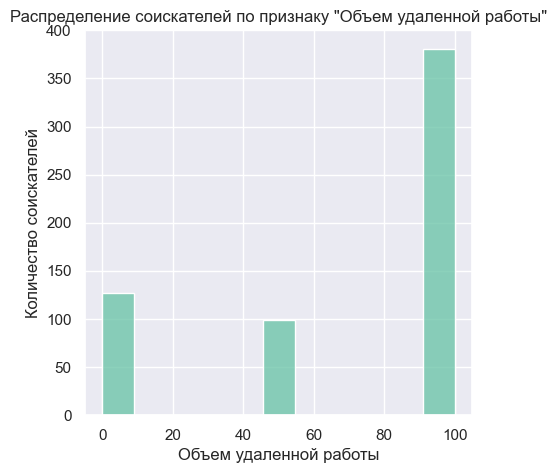

In [243]:
fig, axes=plt.subplots(1,1, figsize=(5,5))
sns.histplot(data=salaries['remote_ratio'])
axes.set(xlabel='Объем удаленной работы', ylabel='Количество соискателей')
axes.set_title('Распределение соискателей по признаку "Объем удаленной работы"')

Выводы: 62% работали почти полностью или полностью удаленно. 17% имели частично удаленную работу и около 21% работали оффлайн все время или почти все время.

#### Изучение признака company_size

In [244]:
company_size=salaries['company_size'].value_counts(normalize=True)*100
company_size

company_size
M    53.706755
L    32.619440
S    13.673806
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Распределение соискателей по признаку "Размер компании"')

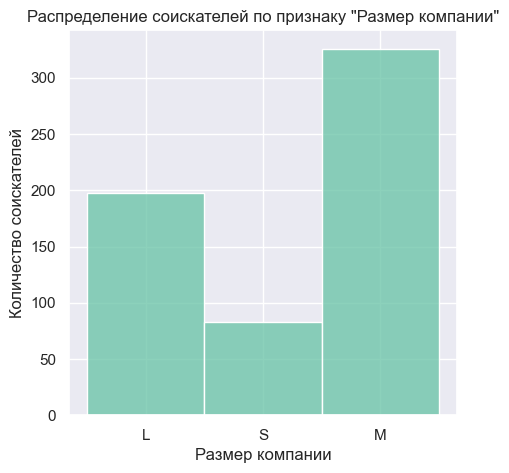

In [245]:
fig, axes=plt.subplots(1,1, figsize=(5,5))
sns.histplot(data=salaries['company_size'])
axes.set(xlabel='Размер компании', ylabel='Количество соискателей')
axes.set_title('Распределение соискателей по признаку "Размер компании"')

Выводы: Большинство соискателей работали в компаниях средних и крупных. Меньше всего соискателей работали в маленьких компаниях.

#### Изучение признака job_title

In [246]:
job_title=salaries['job_title'].value_counts()
print(f'Всего {job_title.shape[0]} должностей')

Всего 50 должностей


In [247]:
# Получаем те должности, в которых более 10 соискателей
indexes_job_titles=job_title[job_title>=10].index

In [248]:
# Оставим только должности, в которых более 10 соискателей, а остальные заменим на 'Other'
salaries['job_title']=salaries['job_title'].apply(lambda x: x if x in indexes_job_titles else 'Other')

# Распределение по должностям в процентах
job_title=salaries['job_title'].value_counts(normalize=True)*100
job_title


job_title
Other                        25.535420
Data Scientist               23.558484
Data Engineer                21.746293
Data Analyst                 15.980231
Machine Learning Engineer     6.754530
Research Scientist            2.635914
Data Science Manager          1.976936
Data Architect                1.812191
Name: proportion, dtype: float64

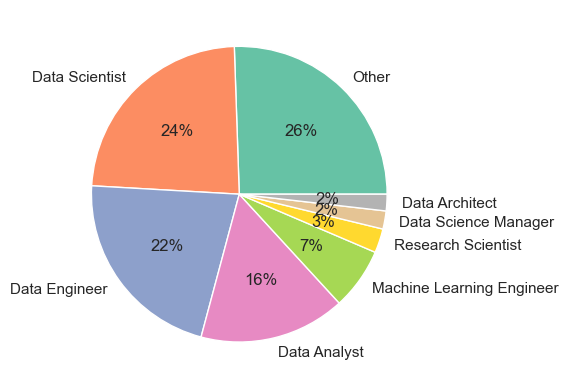

In [249]:
plt.pie(job_title, labels=job_title.index, autopct='%.0f%%')
plt.show()

Выводы: Так как с точки зрения технического задания нас интересуют прежде всего должности Data Scientist и Data Engineer, а именно этих должностей в датасете больше всего (24% и 22% соотвественно), то была провеедена замена. Все должности, которые имели менее 10 представителей, были заменены на "Other". На третьей позиции по популярности профессия Data Analyst  - 16%

# Изучение влияния каждого из признаков на размер зарплаты

####  Влияние job_title

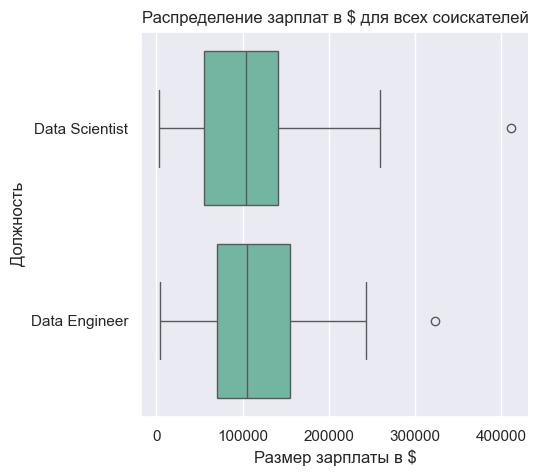

In [250]:
# Рассмотрим распределение зарплат для профессий Data Scientist и Data Engineer
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')]

sns.boxplot(df[['salary_in_usd', 'job_title']], y='job_title', x='salary_in_usd', orient='h')
axes.set(xlabel='Размер зарплаты в $', ylabel='Должность')
axes.set_title('Распределение зарплат в $ для всех соискателей')

plt.show()

In [251]:
salaries_by_job=df.groupby('job_title')['salary_in_usd'].describe().round(2)
salaries_by_job

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,132.0,112725.00,57629.08,4000.0,70039.5,105500.0,154600.0,324000.0
Data Scientist,143.0,108187.83,64112.84,2859.0,54724.0,103691.0,140850.0,412000.0


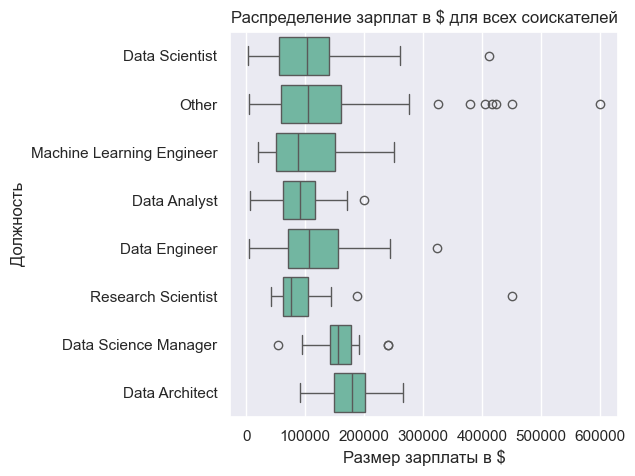

In [252]:
# Рассмотрим распределение зарплат для всех профессий
fig, axes=plt.subplots(1,1, figsize=(5,5))
sns.boxplot(salaries[['salary_in_usd', 'job_title']], y='job_title', x='salary_in_usd', orient='h')
axes.set(xlabel='Размер зарплаты в $', ylabel='Должность')
axes.set_title('Распределение зарплат в $ для всех соискателей')

plt.show()

1. В среднем зарплата датаинженеров немного выше зарплаты датасайентистов, но медианные зарплаты при этом совпадают. При этом у датасайентистов немного больше межквартильный размах. 
2. Обе категории имеют по одному выбросу.
3. Если рассмотреь все категрии вместе, то оказывается, что большинство выбросов вошли в категорию "Other". Вероятно это объясняется тем что большинство руководящих должностей попали именно в эту категорию.
4. Остальные категории имеют по 1-2 выброса.
5. Самый высокий уровень медианной зарплаты (и вообще уровень зарплаты) у Data Science Manager и у Data Architect.
6. Cамые низкие зарплаты у Reserch Scientist. Возможно, это объясняется тем, что исследователи работают не на конкретный бизнес, а в научной сфере, где уровень зарплат чуть ниже в целом.

Гипотеза 1: Средняя зарплата датаинженеров выше средней зарплаты датасайентистов, но медианные зарплаты при этом совпадают


### Влияние признака company_size


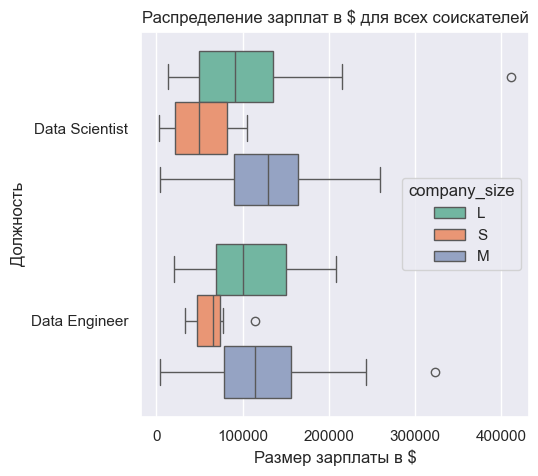

In [253]:
# Рассмотрим распределение зарплат Data Scientist и Data Engineer для компаний разного размера
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')]

sns.boxplot(df[['salary_in_usd', 'job_title', 'company_size']], y='job_title', x='salary_in_usd', orient='h', hue='company_size')
axes.set(xlabel='Размер зарплаты в $', ylabel='Должность')
axes.set_title('Распределение зарплат в $ для всех соискателей')

plt.show()

1. В маленьких компаниях зарплаты как датасайентистов, так и датаинженеров существенно ниже, чем зарплаты в крупных и средних компаниях.
2. В компаниях среднего размера датасайентистам плалят чуть больше, чем датаинженерам.
3. А в крупных компаниях - наоборот: зарплата датаинженеров чуть выше (как медианная, так и средняя)

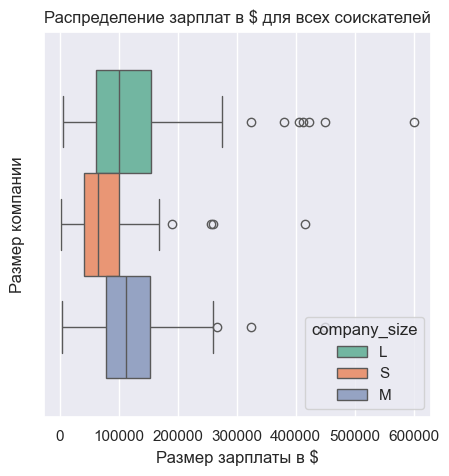

In [254]:
# Рассмотрим распределение зарплат по всему датасету для компаний разного размера
fig, axes=plt.subplots(1,1, figsize=(5,5))
sns.boxplot(salaries[['salary_in_usd', 'company_size']], x='salary_in_usd', orient='h', hue='company_size')
axes.set(xlabel='Размер зарплаты в $', ylabel='Размер компании')
axes.set_title('Распределение зарплат в $ для всех соискателей')

plt.show()

In [255]:
# Статистика зарплат по всем соискателям по размеру компании
salaries_by_company_size=df.groupby('company_size')['salary_in_usd'].describe().round(2)
salaries_by_company_size

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,82.0,103738.68,64859.83,13400.0,53579.5,98141.0,140300.0,412000.0
M,166.0,122623.45,57276.05,4000.0,78894.5,121580.0,160000.0,324000.0
S,27.0,55129.48,32345.24,2859.0,29521.5,51321.0,79729.0,115000.0


In [256]:
# Статистика зарплат Data Scientist по размеру компаний
salaries_by_company_size=df[df['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].describe().round(2)
salaries_by_company_size

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.36,71815.18,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.75,56389.53,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


In [257]:
# Статистика зарплат Data Engineer по размеру компаний
salaries_by_company_size=df[df['job_title']=='Data Engineer'].groupby('company_size')['salary_in_usd'].describe().round(2)
salaries_by_company_size

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,37.0,104255.97,56225.27,20000.0,69741.00,100000.0,150000.00,209100.0
M,89.0,119372.74,58153.33,4000.0,78526.00,115000.0,156600.00,324000.0
S,6.0,66342.50,28862.47,33511.0,47516.75,65511.0,74130.25,115000.0


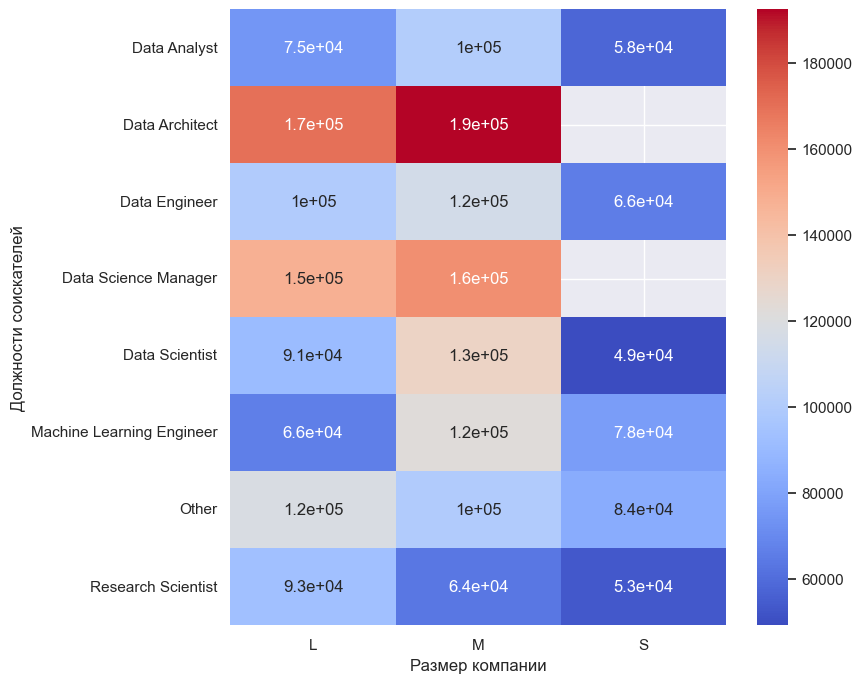

In [258]:
fig, axes=plt.subplots(1,1, figsize=(8,8))
df=salaries.groupby(['company_size', 'job_title'], as_index=False)['salary_in_usd'].median()

df_pivot=pd.pivot_table(df, columns='company_size',index='job_title',values='salary_in_usd')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)
axes.set(xlabel='Размер компании', ylabel='Должности соискателей')
plt.show()

1. В средниx компаниях медианная зарплата по многим должностям несколько выше, чем в крупных. Это справедливо для Machine Learning Engineer, Data Science, Data Science Manager, Data Engineer, Data Architecht и Data Analyst。  Однако исследователям (Research Scientist) в крупных компаниях платят существеено больше, чем в средних.
2. Гипотезу 1 следует уточнить: В средних компаниях медианная зарплата датасайентистов выше, чем медианная зарплата датаинженеров. А в крупных и мелких наоборот.
3. Самый высокий уровень зарплат у Data Architecht средник компаний. За ними идут Data Architecht крупных компаний.
4. В крупных компаниях довольно много выбросов по размеру зарплат.




### Влияние признака employee_residence

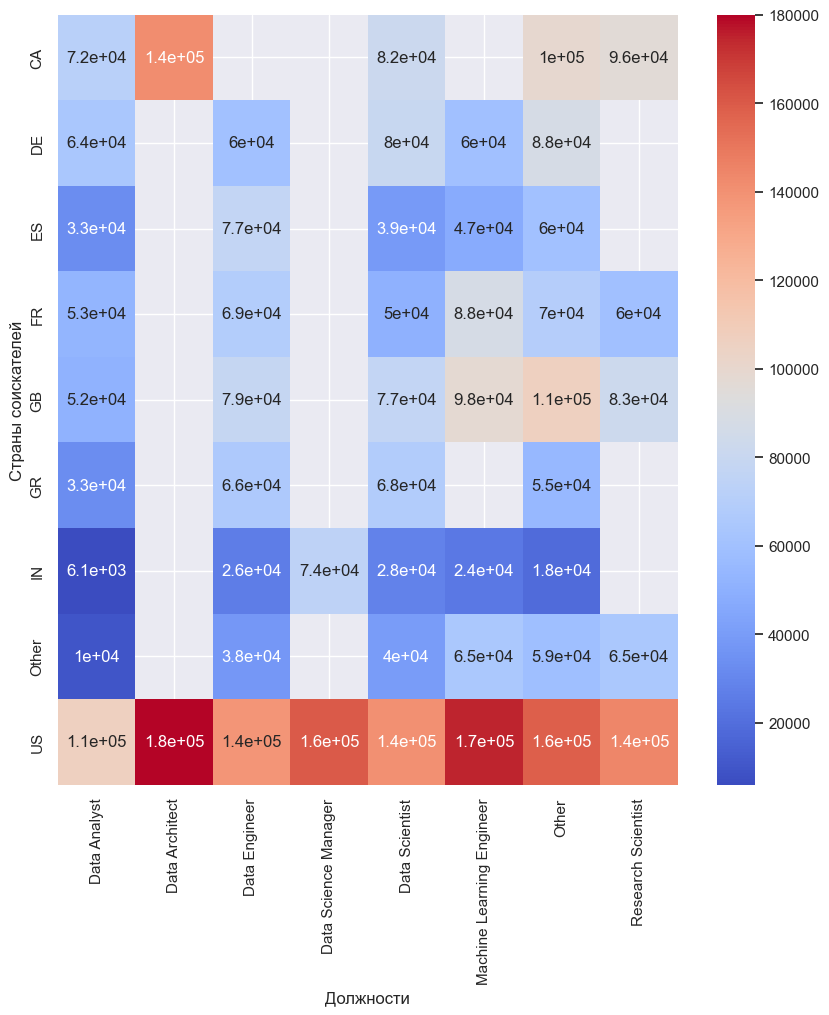

In [259]:
# Рассмотрим распределение зарплат по должностям для соискателей из разных стран
fig, axes=plt.subplots(1,1, figsize=(10,10))
df=salaries.groupby(['employee_residence', 'job_title'], as_index=False)['salary_in_usd'].median()

df_pivot=pd.pivot_table(df, index='employee_residence',columns='job_title',values='salary_in_usd')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)
axes.set(xlabel='Должности', ylabel='Страны соискателей')
plt.show()


1. Самые высокие медианные зарплаты по всем должностям у соискателей из США.
2. В большинтсве стран медианные зарплаты датаинженеров и датасайентистов совпадаю. Но это равенство в основном за счет соискателей из США. Во Франции, например, датаинженерам платят больше, чем датасайентистам, а в Германии - наоборот.
3. Самый высокий уровень зарплат у датаархитекторов (Data Architect), кроме того все они из США или Канады.



### Влияние признака company_location

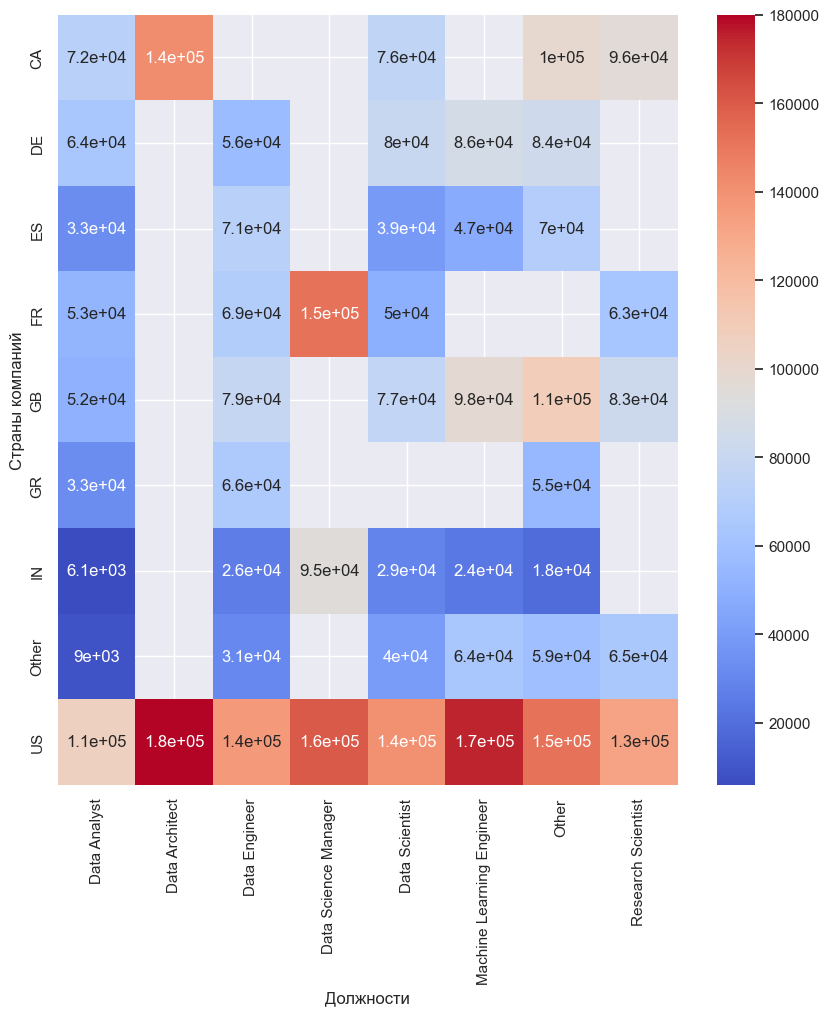

In [260]:
# Рассмотрим распределение зарплат по должностям для соискателей из разных стран
fig, axes=plt.subplots(1,1, figsize=(10,10))
df=salaries.groupby(['company_location', 'job_title'], as_index=False)['salary_in_usd'].median()

df_pivot=pd.pivot_table(df, index='company_location',columns='job_title',values='salary_in_usd')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)
axes.set(xlabel='Должности', ylabel='Страны компаний')
plt.show()

Выводы приблизительно совпадают с выводами по признаку employee_residence, а именно:
1. Так как большинство компаний из США, то равенство медианных зарплат датасайентистов и датаинженеров в этой стране сильно влияет на общую картину по датасету.
2. Но разбивка по странам показывает, что это равенство характерно только для США. В других странах медианные зарплаты датаинженеров и датасайентистов отличаются. Возможно, по другим странам недостаточно данных для окончательных выводов.
3. Самый высокий уровень зарплат по всем должностям наблюдается в компаниях из США.
4. Можно предположить, что компании из США в основном нанимают сотрудников из этой же страны, поэтому в США полностью совпадает картина распределения зарплат, как по признаку employee_residence и company_location.

### Влияние признака work_year

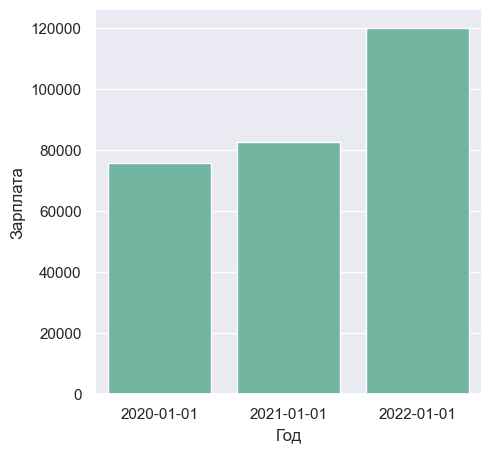

In [261]:
# Рассмотрим медианные зарплаты по годам, учитывая все должности
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries.groupby(['work_year'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='work_year', y='salary_in_usd')
axes.set(xlabel='Год', ylabel='Зарплата')
plt.show()

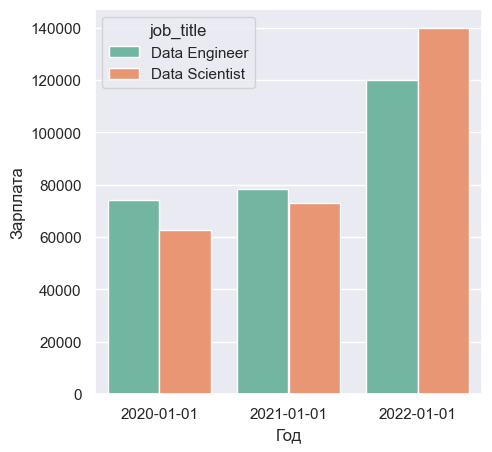

In [262]:
# Сравним изменение медианной зарплаты по годам по должностям Data Scientist и Data Engineer
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')].groupby(['work_year','job_title'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='work_year', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Год', ylabel='Зарплата')
plt.show()

1. C 2020 по 2022 год наблюдался рос зарплат в области работы с данными по всем категориям должностей. Однако, разрыв между 20 и 21 годом незначительный. А в 22 году наблюдается резкий скачок уровня зарплат.
2. До 22 года зарплата датаинженеров была ниже, чем зарплата датасайентистов.
3. В 22 году резко выросла зарплата как датаинженеров, так и датасайентистов. Однако, скачок зарплат датаинженеров был столь высок, то их зарплата в 22 году превысила зарплату датасайентистов.

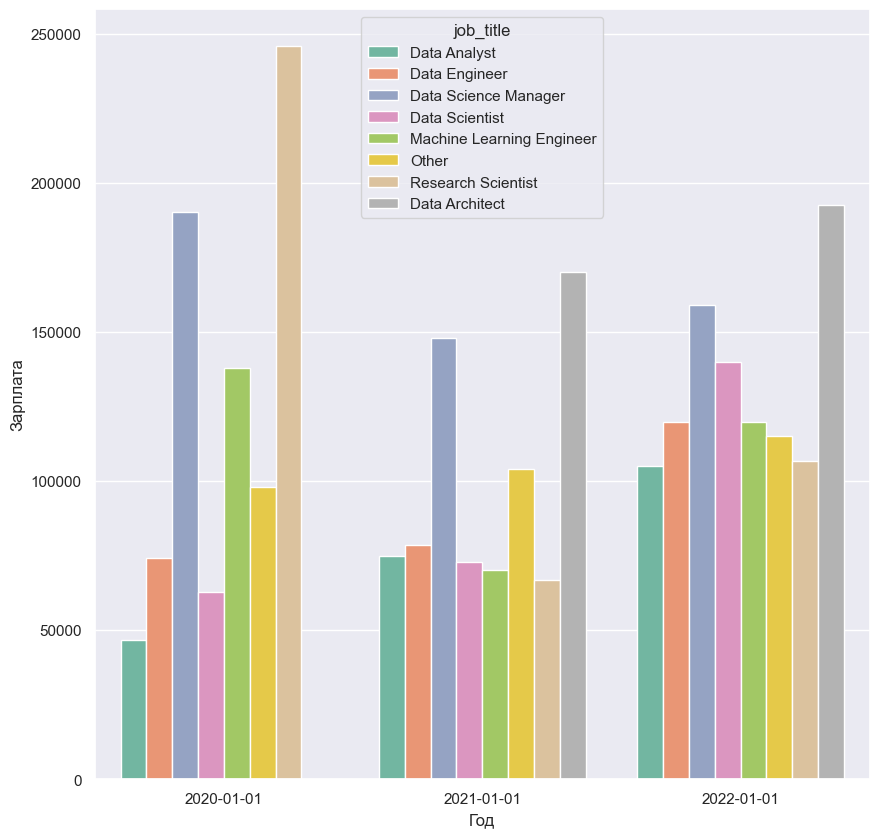

In [263]:
# Сравним изменение медианной зарплаты по годам по всем должностям
fig, axes=plt.subplots(1,1, figsize=(10,10))
df=salaries.groupby(['work_year','job_title'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='work_year', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Год', ylabel='Зарплата')
plt.show()

Если рассмотреть все должности, то можно сделать вывод, что не для всех должностей зарплаты выросли со временем. Видно падение зарплаты для Data Science Manager к 21 году и падение зарплаты Research Scientist. В 22 году их зарплаты начали медленно увеличиваться. Возможно, это связано с пандемией и закрытием или остановкой ряда проектов.



### Влияние признака remote_ratio

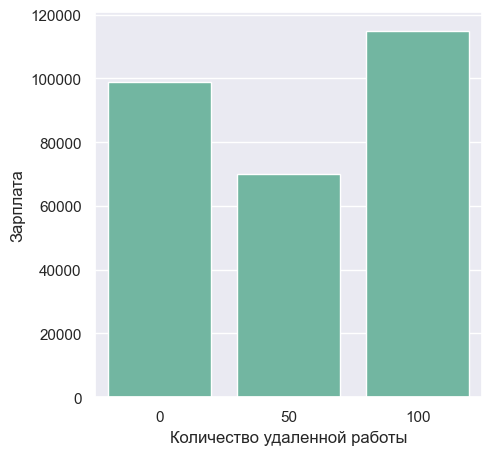

In [264]:
# Рассмотрим медианные зарплаты по всем должностям в разрезе признака remote_ratio
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries.groupby(['remote_ratio'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='remote_ratio', y='salary_in_usd')
axes.set(xlabel='Количество удаленной работы', ylabel='Зарплата')
plt.show()

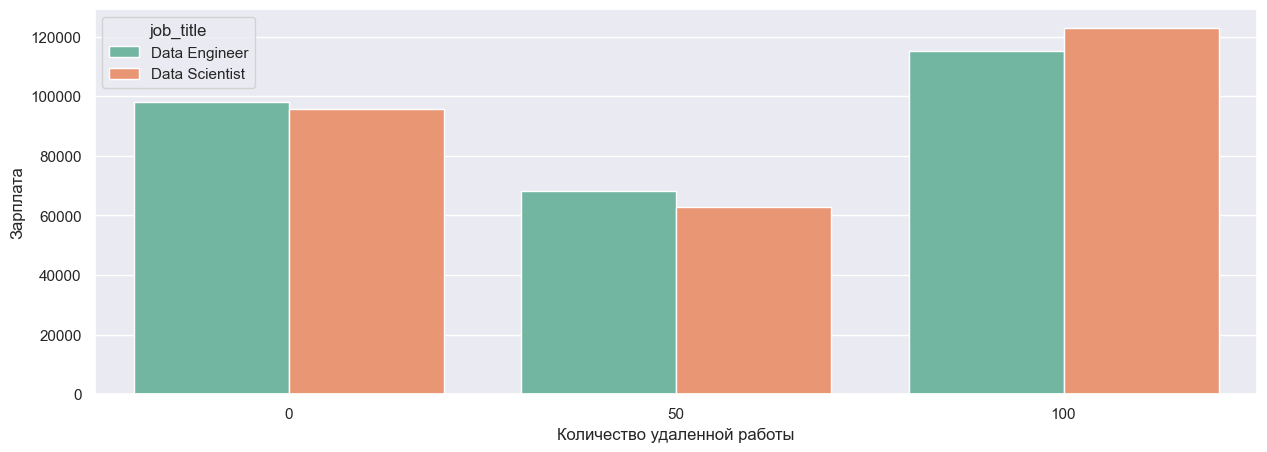

In [265]:
# Сравним изменение медианной зарплаты по годам по должностям Data Scientist и Data Ebgineer
fig, axes=plt.subplots(1,1, figsize=(15,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')].groupby(['remote_ratio','job_title'], as_index=False)['salary_in_usd'].median()
df=df.dropna()
sns.barplot(data=df, x='remote_ratio', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Количество удаленной работы', ylabel='Зарплата')
plt.show()


По всем видам должностей и по интересующим нас в частности (Data Scientist, Data Engineer) наиболее высокую зарплату получют сотрудники, которые почти полностью работают удаленно. Несколько ниже зарплата у тех, кто работает полностью или почти полностью оффлайн. А вот у тех, кто работает частично удаленно, зарплата существеенно ниже зарплат сотрудников со всеми остальными видами занятости.

### Влияние признака employment_type

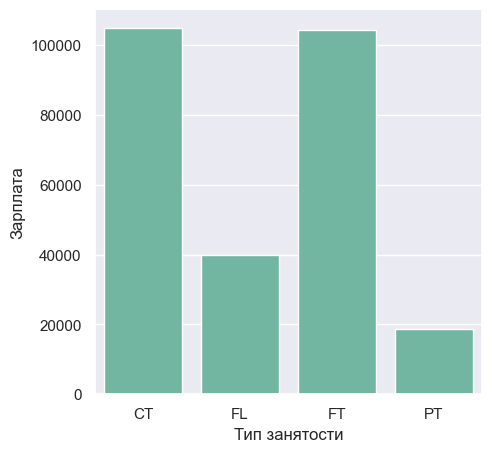

In [266]:
# Рассмотрим медианные зарплаты по всем должностям в разрезе типа занятости
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries.groupby(['employment_type'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='employment_type', y='salary_in_usd')
axes.set(xlabel='Тип занятости', ylabel='Зарплата')
plt.show()

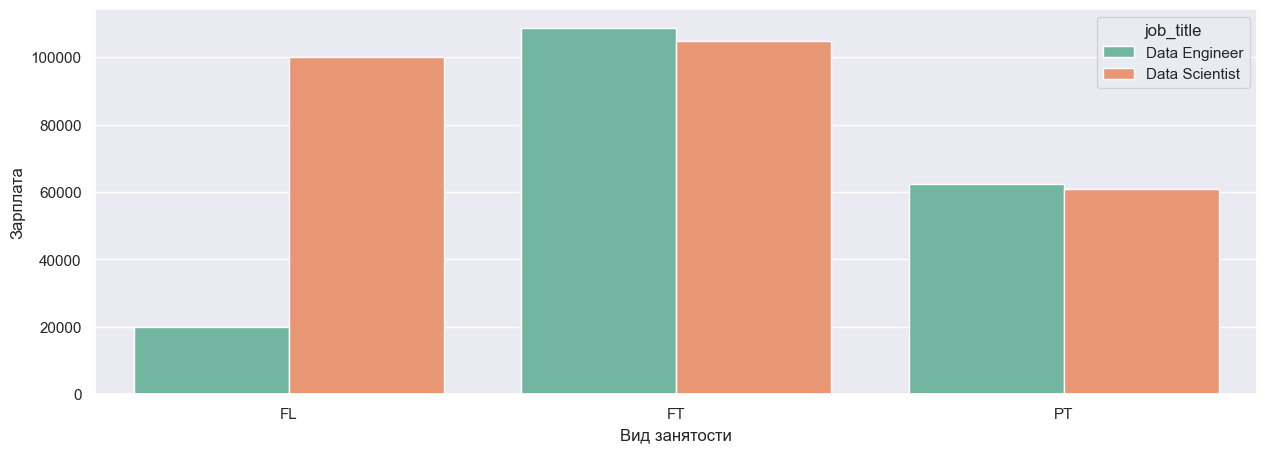

In [267]:
# Сравним изменение медианной зарплаты  должностям Data Scientist и Data Engineer в разрезе типа занятости
fig, axes=plt.subplots(1,1, figsize=(15,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')].groupby(['employment_type','job_title'], as_index=False)['salary_in_usd'].median()
df=df.dropna()
sns.barplot(data=df, x='employment_type', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Вид занятости', ylabel='Зарплата')
plt.show()


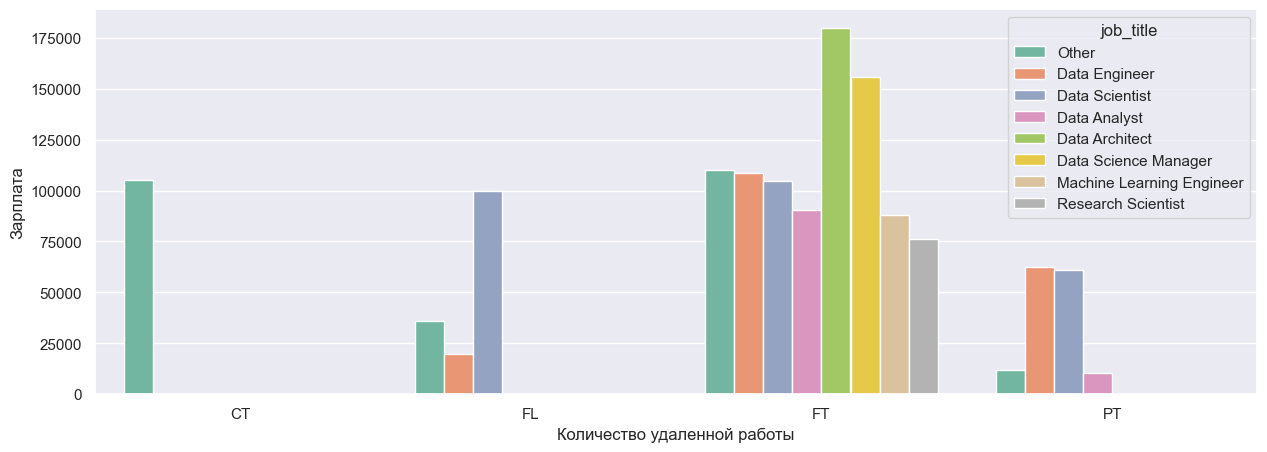

In [268]:
# Общая картина зарплат в разрезе типа занятости и должности
fig, axes=plt.subplots(1,1, figsize=(15,5))
df=salaries.groupby(['employment_type','job_title'], as_index=False)['salary_in_usd'].median()
df=df.dropna()
sns.barplot(data=df, x='employment_type', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Количество удаленной работы', ylabel='Зарплата')
plt.show()

1. Самые высокие зарплаты у тех, кто работает полный рабочий день. У Data Engineer на фрилансе зарплата остается достаточно высокой. 
2. При неполном рабочем дне как у Data Science, так и у Data Engineer зарплата снижается примерно в два раза.
3. Но так как 97% датасета  - это сотрудники, работавшие на полный рабочий день, не факт, что эти предположения статистически значимы.
4. Высокие зарплаты в категории other скорее всего за счет выбросов. В категории CT очень мало данных, чтобы предполагать статистическую значимость этого наблюдения

### Влияние признака experience_level

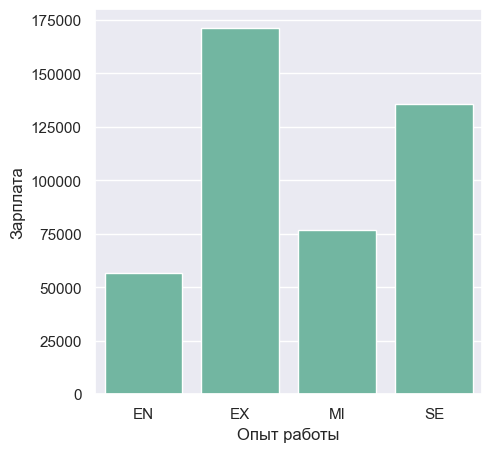

In [269]:
# Рассмотрим медианные зарплаты по всем должностям в разрезе experience_level
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries.groupby(['experience_level'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='experience_level', y='salary_in_usd')
axes.set(xlabel='Опыт работы', ylabel='Зарплата')
plt.show()

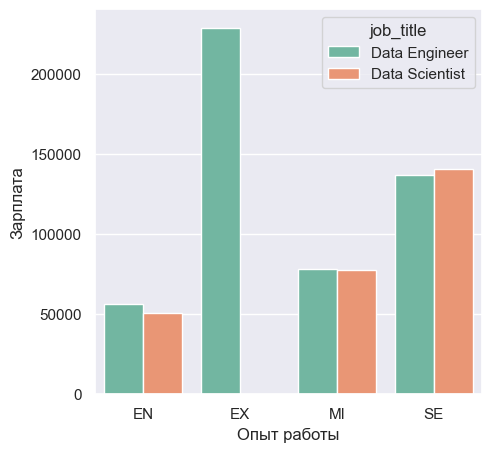

In [270]:
# Сравним изменение медианной зарплаты  должностям Data Scientist и Data Ebgineer в разрезе experience_level
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries[(salaries['job_title']=='Data Scientist') | (salaries['job_title']=='Data Engineer')].groupby(['experience_level','job_title'], as_index=False)['salary_in_usd'].median()
df=df.dropna()
sns.barplot(data=df, x='experience_level', y='salary_in_usd', hue='job_title')
axes.set(xlabel='Опыт работы', ylabel='Зарплата')
plt.show()

Зависимсоть от опыта работы прямая. Чем выше уровень соискателя, тем выше заработная плата. Заработные платы Data Scientist и Data Engineer при этом отличаются друг от друга незначительно во всех группах, кроме группы EX. На этом уровне отсутствуют соискатели с должностью Data Scientist。Зарплата Data Engineer для уровня EX возрастает скачкообразно.

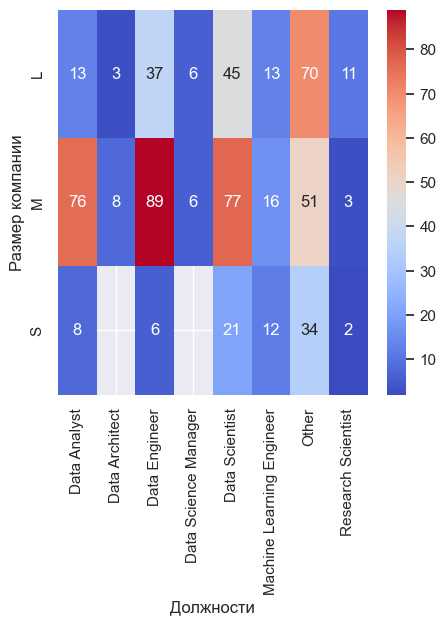

In [271]:
# Определим есть ли влияние наличия определенных должностей на размер компании
fig, axes=plt.subplots(1,1, figsize=(5,5))
df=salaries.groupby(['company_size', 'job_title'], as_index=False)['salary_in_usd'].count()
df_pivot=pd.pivot_table(df, index='company_size',columns='job_title',values='salary_in_usd')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)
axes.set(xlabel='Должности', ylabel='Размер компании')
plt.show()


1. Да, зависимость наблюдается. В малых компания практически нет должностей Data Engineer。Скорее всего малая компания пока не может себе позволить такого специалиста. 

2. А вот в компаниях среднего размера и Data Engineer и Data Scientist наблюдаются в самых больших количествах. Возможно, это объясняется тем, что средние  компании находятся в стадии бурного развития и нуждаются в таких специалистах. В то время как в крупных компаниях все процессы уже настроены и устоялись, поэтому там требуется несколько меньше таких сотрудников.

In [272]:
#заменим у категориальных признаков тип на category
lst=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

for elem in lst:
    salaries[elem]=salaries[elem].astype('category')

salaries.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          607 non-null    int64         
 1   work_year           607 non-null    datetime64[ns]
 2   experience_level    607 non-null    category      
 3   employment_type     607 non-null    category      
 4   job_title           607 non-null    category      
 5   salary_in_usd       607 non-null    int64         
 6   employee_residence  607 non-null    category      
 7   remote_ratio        607 non-null    category      
 8   company_location    607 non-null    category      
 9   company_size        607 non-null    category      
dtypes: category(7), datetime64[ns](1), int64(2)
memory usage: 20.2 KB


______________________________________________________________________________________________________________________________________
# Статистический анализ данных

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

m1, m2 , m3 - медианные зарплаты Data Scientists в 2020, 2021 и 2022 гг соответственно.

Гипотеза H0: С течением времени зарплаты Data Scientist остаются постоянными или уменьшаются.   m1=m2=m3

Гипотеза H1: С течением времени зарплаты Data Scientist изменяются. m1!=m2!=m3 (На основе первичного анализа мы видели, что она растет. Можно ли утверждать, что если нулевая гипотеза отвергается, то зарплата именно растет?)

Тест будет многовыборочным, так как нам нужно рассмотреть медианные зарплаты по трем выборкам - за 2020, 2021 и 2022 годы. Данные для каждого года разные, поэтому выборки будут независимыми. Следовательно, нужен многовыборочный непарный тест. 
Проверим распределение на нормальность


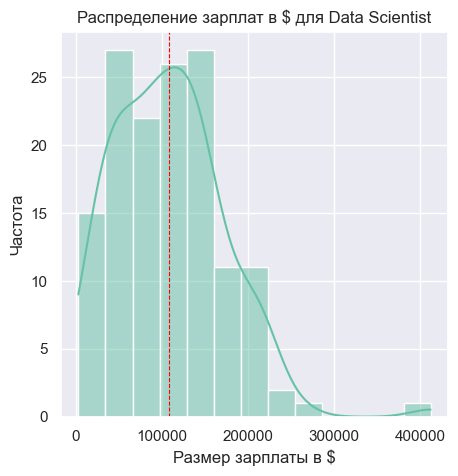

In [273]:
# Отберем данные исключительно по Data Scientists
dataScientists=salaries[salaries['job_title']=='Data Scientist']
# Построим распределение зарплат для должности Data Scientist

fig, axes=plt.subplots(1,1, figsize=(5,5))

sns.histplot(dataScientists['salary_in_usd'], kde=True)
axes.set(xlabel='Размер зарплаты в $', ylabel='Частота')
axes.set_title('Распределение зарплат в $ для Data Scientist')
axes.axvline(dataScientists['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

Визуальный анализ показывае, что данные не распределены нормально. Проверим это методом Шапиро-Уилка

In [274]:
# Проверка распределения зарплат Data Scientist тестом Шапиро-Уилка
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(dataScientists['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


Так как распределение не нормальное, то выбросы удалять нужно методом z-отклонения

In [275]:
# Объявим функцию для удаления выбросов по методу z-отклонения
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [276]:
outliers, dataScientists = outliers_z_score(dataScientists, 'salary_in_usd', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {dataScientists.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 140


In [277]:
d0=dataScientists[dataScientists['work_year']=='2020-01-01']['salary_in_usd'].values.tolist()
d1=dataScientists[dataScientists['work_year']=='2021-01-01']['salary_in_usd'].values.tolist()
d2=dataScientists[dataScientists['work_year']=='2022-01-01']['salary_in_usd'].values.tolist()

print(f'размеры выборок: 2020 год: {len(d0)},   2021 год: {len(d1)},    2022 год: {len(d2)}')

размеры выборок: 2020 год: 21,   2021 год: 42,    2022 год: 77


In [278]:
# Применение критерия Краскера-Уиллкса
# задаём уровень значимости
alpha = 0.05 

# проводим тест
_, p = stats.kruskal(d0, d1, d2)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Нулевая гипотеза отвергнута с уровнем значимости 0.05. То есть, доказано, что заработная плата Data Scientists изменяется с течением времени.

(Достаточно ли этого, чтобы утверждать, что она именно растет?)
_____________________________________________________________________________________________________________________________________________________

#### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Гипотеза H0: Медианные зарплаты Data Scientist  и Data Engineer в 2022 году не отличаются m1=m2
Альтернативная гипотеза H1: Медианные зарплаты Data Scientist  и Data Engineer в 2022 году отличаются m1!=m2

In [279]:
# Выборка зарплат Data Engineer и Data Scientist за 2022 год
allData2022=salaries[((salaries['job_title']=='Data Engineer') | (dataScientists['work_year']=='2022-01-01')) & (salaries['work_year']=='2022-01-01')]

# Выборка зарплат Data Engineer  за 2022 год
dataEngineers2022=salaries[(salaries['job_title']=='Data Engineer') & (salaries['work_year']=='2022-01-01')]['salary_in_usd']

# Выборка зарплат  Data Scientist за 2022 год
dataScientists2022=dataScientists[dataScientists['work_year']=='2022-01-01']['salary_in_usd']

In [280]:
# Проверка распределения зарплат Data Engineer за 2022год тестом Шапиро-Уилка 

# задаём уровень значимости
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(dataEngineers2022)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.010
Распределение не нормальное


In [281]:
# Проверка распределения зарплат Data Scientists за 2022год тестом Шапиро-Уилка 

# задаём уровень значимости
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(dataScientists2022)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.327
Распределение нормальное


Одна группа данные распределена нормально, другая нет. В этом случае стоит выбирать метод для НЕ нормального распределения.

Text(0.5, 1.0, 'Распределение зарплат в $ для  соискателей')

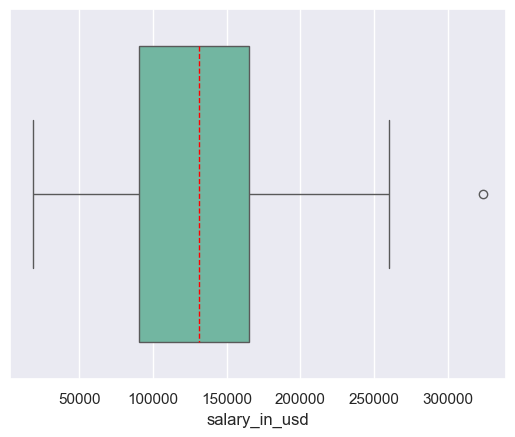

In [282]:
sns.boxplot(allData2022['salary_in_usd'], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes.set(xlabel='Размер зарплаты в $')
axes.set_title('Распределение зарплат в $ для  соискателей')

Имеется один выборос, который нужно удалить

In [283]:
# Удаляем выбросы 
outliers, allData2022 = outliers_z_score(allData2022, 'salary_in_usd', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {allData2022.shape[0]}')

Число выбросов по методу z-отклонения: 2
Результирующее число записей: 164


Распределение не является нормальным, количество групп - две и они независимы, следовательно, нужен U-критерий Манна-Уитни c двусторонней альтернативной типотезой

In [284]:
alpha=0.05

_, p=stats.mannwhitneyu(dataEngineers2022, dataScientists2022, alternative='two-sided')

print('p-value={:.3f}'.format(p))

if p<=alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))    

p-value=0.155
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Нулевая гипотеза принята с уровнем значимости 0.05. Получается, что зарплаты Data Scientist и Data Engineer в 2022 году примерно одинаковы
__________________________________________________________________________________________________________________________________________

###  Как соотносятся зарплаты Data Scientist в компаниях различных размеров?

Text(0.5, 1.0, 'Распределение зарплат в $ для Data Scientists')

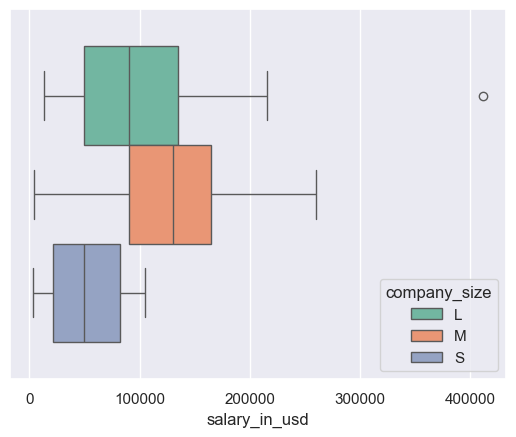

In [285]:
allDataScientists=salaries[(salaries['job_title']=='Data Scientist')]

sns.boxplot(allDataScientists[['salary_in_usd', 'company_size']],  x='salary_in_usd', orient='h', hue='company_size')
axes.set(xlabel='Размер зарплаты в $')
axes.set_title('Распределение зарплат в $ для Data Scientists')

У нас есть компании трех размеров: S, M, L.
m1,m2,m3 - медианные зарплаты Data Scientists соответствующие каждому размеру компании

Нулевая гипотеза H0: зарплаты Data Scientist от размера компании НЕ зависят m1=m2=m3

Альтернативная гипотеза: зарплаты зависят от размера компаний m1!=m2!=m3


In [286]:
# Удаляем выбросы 
outliers, allDataScientists = outliers_z_score(allDataScientists, 'salary_in_usd', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {allDataScientists.shape[0]}')

Число выбросов по методу z-отклонения: 1
Результирующее число записей: 142


In [287]:
# Проверим нормальность распределения выборок для разного размера компаний
DS_S=allDataScientists[allDataScientists['company_size']=='S']
DS_M=allDataScientists[allDataScientists['company_size']=='M']
DS_L=allDataScientists[allDataScientists['company_size']=='L']

alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(DS_S['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение для S не нормальное')
else:
    print('Распределение для S нормальное')

p-value = 0.189
Распределение для S нормальное


In [288]:
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(DS_M['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение для M не нормальное')
else:
    print('Распределение для M нормальное')

p-value = 0.639
Распределение для M нормальное


In [289]:
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(DS_L['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение для L не нормальное')
else:
    print('Распределение для L нормальное')

p-value = 0.042
Распределение для L не нормальное


Для одной из выборок (компании размера L) распределение не является нормальным, следовательно нужно выбирать тест для распределения отличного от нормального, многовыборочный для независимых выборок. Тест Краскера-Уоллиса

In [290]:
# Применение критерия Краскера-Уиллкса
# задаём уровень значимости
alpha = 0.05 

# проводим тест
_, p = stats.kruskal(DS_S['salary_in_usd'], DS_M['salary_in_usd'], DS_L['salary_in_usd'])

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Нулевая гипотеза отвергнута с уровнем значимости 0.05. Зарплата Data Scientist зависит от размера компании.

(Достаточно ли этого, чтобы на основании первичного анализа утверждать, что зарплата на первом месте зарплата компаний размера M, потом L, потом S? Или здесь нужно добавлять еще парные тесты?)
_______________________________________________________________________________________________________________________________________________

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [291]:
# Добавим два признака булевского типа DS=1, если должность Data scientist есть, DS=0, если должности Data Scientist нет
# DE=1, если должность Data Engineer есть, DE=0, если должности Data Engineer нет
salaries['DS']=salaries['job_title'].apply(lambda x: 1 if x=='Data Scientist' else 0)
salaries['DE']=salaries['job_title'].apply(lambda x: 1 if x=='Data Engineer' else 0)

Не уверена, что это корректная замена, потому что мы не можем провести группировку по конкретным компаниям. Из того, что в одной строке компания размера L НЕ имеет должности Data Scientist никак не следует, что та же компания в другой строке будет упомянута уже с должностью Data Scientist

In [292]:
# Используем критерий Хи-квадрат, так как речь о двух категориальных признаках. Один - размер компании, другой - наличие/отсутсвие должности.
# Объявим функцию
def hi(p1, p2):
    alpha=0.05
    table=pd.crosstab(p1, p2)
    _, p, _, _=stats.chi2_contingency(table)
    print('p-value={:.3f}'.format(p))
    if p<=alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}.У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))    

In [293]:
# Проверяем для Data scientist
hi(salaries['company_size'], salaries['DS'])

p-value=0.897
p-значение больше, чем заданный уровень значимости 0.05.У нас нет оснований отвергнуть нулевую гипотезу.


In [294]:
# Проверяем для Data Engineer
hi(salaries['company_size'], salaries['DE'])

p-value=0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Получается, что между наличием должности Data Scientists и размером компании связь имеется, а между наличием должности Data Engineer  и размером компании связи нет
______________________________________________________________________________________________________________________________________________

Проверим является ли статистически значимой разница в зарплате между теми, у кого работа полностью удаленная (remote_ratio=100) и теми, у кого почти нет удаленной работы (remote_ratio=0).
На диаграмме ниже видна некоторая разница в пользу тех, кто работет удаленно, но неясно является ли она статистически значимой

[Text(0.5, 26.5, 'Количество удаленной работы'), Text(25.0, 0.5, 'Зарплата')]

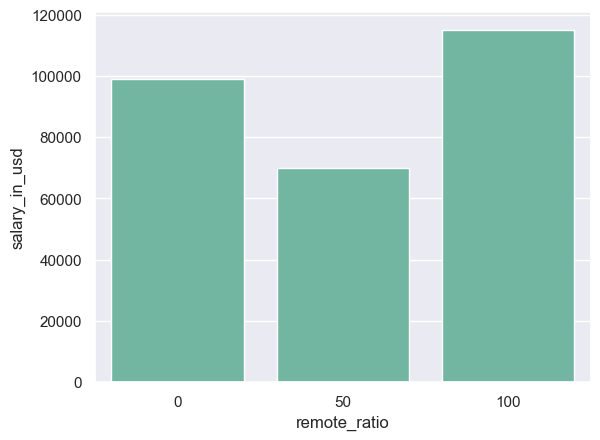

In [295]:
df=salaries.groupby(['remote_ratio'], as_index=False)['salary_in_usd'].median()
sns.barplot(data=df, x='remote_ratio', y='salary_in_usd')
axes.set(xlabel='Количество удаленной работы', ylabel='Зарплата')

Гипотеза H0: Медианная заработная плата тех, кто работает оффлайн (m1) не меньше заработной платы тех, кто почти все время на удаленной работе (m2) m1>=m2

Гипотеза H1: медианная заработная плата тех, кто целиком на удаленной работе больше, чем медианная заработная плата тех, кто  работе оффлайн  m1<m2

In [296]:
# Сделаем две отдельные выборки для remote_ratio=0 и для remote_ratio=100
salary_0=salaries[salaries['remote_ratio']==0]
salary_100=salaries[salaries['remote_ratio']==100]

In [297]:
# Проверим распределение для remote_ratio=0 на нормальность
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(salary_0['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение  не нормальное')
else:
    print('Распределение  нормальное')

p-value = 0.000
Распределение  не нормальное


In [298]:
# Проверим распределение для remote_ratio=100 на нормальность
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(salary_100['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение  не нормальное')
else:
    print('Распределение  нормальное')

p-value = 0.000
Распределение  не нормальное


Проверим есть ли выбросы в обоих распределениях

<Axes: xlabel='salary_in_usd'>

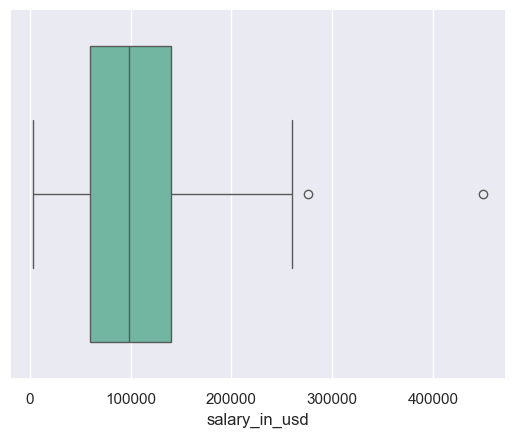

In [299]:

sns.boxplot(salary_0, x='salary_in_usd', orient='h')


<Axes: xlabel='salary_in_usd'>

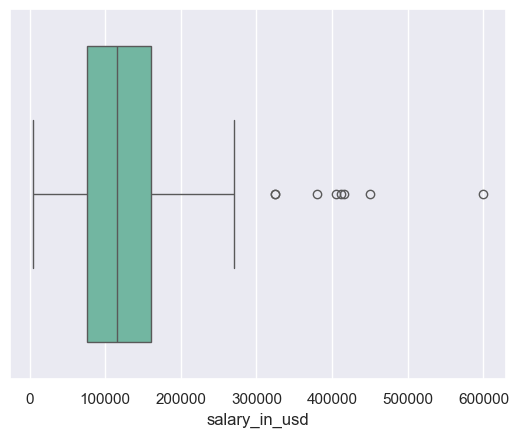

In [300]:
sns.boxplot(salary_100, x='salary_in_usd', orient='h')


In [301]:
# Удаляем выбросы для выборки remote_ratio=0
outliers, salary_0 = outliers_z_score(salary_0, 'salary_in_usd', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {salary_0.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 123


In [302]:
# Удаляем выбросы для выборки remote_ratio=100 
outliers, salary_100 = outliers_z_score(salary_100, 'salary_in_usd', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {salary_100.shape[0]}')

Число выбросов по методу z-отклонения: 6
Результирующее число записей: 375


Для проверки гипотезы нужен критерий Манна-Уитни, так как у нас две выборки, они независимы и обе распределены не нормально. Альтернативная гипотеза будет правосторонняя  alternative='greater'

In [303]:
# задаём уровень значимости
alpha = 0.05 

# проводим тест
_, p = stats.mannwhitneyu(salary_100['salary_in_usd'], salary_0['salary_in_usd'], alternative='greater' )

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.012
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Получается, что разница зарплат впользу тех, кто работает полностью удаленно, имеется и она статистически значима

### Проверим, равна ли медианная зарплата для компаний из US 140000

H0: Медианная зарплата, предлагаемая компаниями из US， равна 140000

H1: Медианная зарплата, предлагаемая компаниями из US， НЕ равна 140000

In [304]:
# Сделаем выборку компаний из US
company_from_US=salaries[salaries['company_location']=='US']

In [305]:
# проводим тест Шапиро — Уилка, чтобы проверить нормально ли распределен размер зарплаты
_, p = stats.shapiro(company_from_US['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение  не нормальное')
else:
    print('Распределение  нормальное')

p-value = 0.000
Распределение  не нормальное


In [306]:
# Удаляем выбросы для выборки 
outliers, salary_0 = outliers_z_score(company_from_US, 'salary_in_usd', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {salary_0.shape[0]}')

Число выбросов по методу z-отклонения: 6
Результирующее число записей: 349


В данном случае выборка одна и распределение не является  нормальным. значит нам нужен критерий знаков

In [307]:
from statsmodels.stats.descriptivestats import sign_test
# проводим тест
_, p = sign_test(company_from_US['salary_in_usd'], 140000)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.163
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Можно считать, что медианная зарплата, предлагаемая компаниями из США равна 140000$